In [8]:
import json
university_brand = {
    "NCKU": 68.690,
    "NDMU": 68.612,
    "NTU": 68.175,
    "NTHU": 67.660,
    "NTUST": 64.244,
    "NCCU": 62.093,
    "NTUT": 60.782,
    "NCU": 54.982,
    "TKU": 52.128,
    "NCHU": 52.085,
    "FCU": 50.627,
    "NKFUST": 49.272,
    "THU": 48.721,
    "SCU": 47.276,
    "CYCU": 46.381,
    "NPUST": 46.099,
    "NTNU": 45.950,
    "CCU": 44.899
}
university_location = {
    "NCKU": ["南部"],
    "NDMU": ["北部"],
    "NTU": ["北部"],
    "NTHU": ["北部"],
    "NTUST": ["北部"],
    "NCCU": ["北部"],
    "NTUT": ["北部"],
    "NCU": ["北部"],
    "TKU": ["北部"],
    "NCHU": ["中部"],
    "FCU": ["中部"],
    "NKFUST": ["南部"],
    "THU": ["中部"],
    "SCU": ["北部"],
    "CYCU": ["北部"],
    "NPUST": ["中部"],
    "NTNU": ["北部"],
    "CCU": ["南部"],
}
university_publicorprivate = {
    "NCKU": ["國立"],
    "NDMU": ["國立"],
    "NTU": ["國立"],
    "NTHU": ["國立"],
    "NTUST": ["國立科大"],
    "NCCU": ["國立"],
    "NTUT": ["國立科大"],
    "NCU": ["國立"],
    "TKU": ["私立"],
    "NCHU": ["國立"],
    "FCU": ["私立"],
    "NKFUST": ["國立科大"],
    "THU": ["私立"],
    "SCU": ["私立"],
    "CYCU": ["私立"],
    "NPUST": ["國立科大"],
    "NTNU": ["國立"],
    "CCU": ["國立"],
}
universities = {}
for university in university_brand:
    universities[university] = {
        "brand": university_brand[university],
        "location": university_location[university],
        "public_or_private": university_publicorprivate[university]
    }
json_data = json.dumps(universities, indent=4, ensure_ascii=False)
with open("universities.json", "w", encoding="utf-8") as json_file:
    json_file.write(json_data)


In [10]:
# 問題1：在品牌力排名前五的大學當中，有幾所是位於北部的國立大學或國立科大？
top_five_universities = list(university_brand.keys())[:5]

num_northern_public_universities = sum(1 for uni in top_five_universities if "北部" in university_location[uni] and ("國立" in university_publicorprivate[uni] or "國立科大" in university_publicorprivate[uni]))

print("在品牌力排名前五的大學中，位於北部的國立大學或國立科大的數量為:", num_northern_public_universities)

在品牌力排名前五的大學中，位於北部的國立大學或國立科大的數量為: 4


In [11]:
# 問題2：師大在全部的資料當中排名第幾呢？品牌力是多少？
rank = sorted(university_brand.items(), key=lambda x: x[1], reverse=True).index(("NTNU", university_brand["NTNU"])) + 1

brand_power = university_brand["NTNU"]

print("師大在全部的資料當中排名第", rank, "，品牌力是", brand_power)


師大在全部的資料當中排名第 17 ，品牌力是 45.95


In [12]:
# 問題3：全部的資料當中，有幾所是私立大學呢，分別是那些學校？
num_private_universities = 0
private_universities = []

for university, ownership in university_publicorprivate.items():
    if "私立" in ownership:
        num_private_universities += 1
        private_universities.append(university)

print("全部的資料當中，有", num_private_universities, "所是私立大學，分別是:", private_universities)


全部的資料當中，有 5 所是私立大學，分別是: ['TKU', 'FCU', 'THU', 'SCU', 'CYCU']


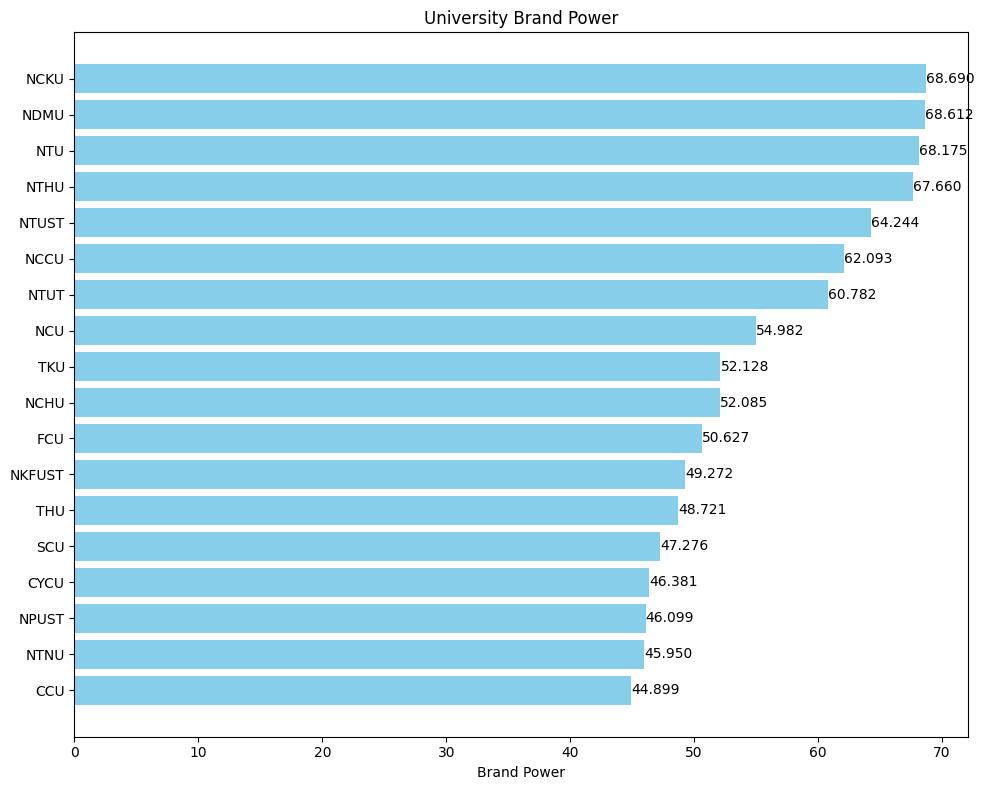

In [9]:
import matplotlib.pyplot as plt

# 从JSON文件中加载数据
with open("universities.json", "r", encoding="utf-8") as json_file:
    universities = json.load(json_file)

# 提取大学名称和对应的品牌力值
university_brand = {uni: data["brand"] for uni, data in universities.items()}

# 根据品牌力值从高到低对大学进行排序
sorted_universities = sorted(university_brand.items(), key=lambda x: x[1], reverse=True)

# 提取排序后的大学名称和对应的品牌力值
sorted_university_names = [uni[0] for uni in sorted_universities]
sorted_brand_powers = [uni[1] for uni in sorted_universities]

# 绘制长条图
plt.figure(figsize=(10, 8))
plt.barh(sorted_university_names, sorted_brand_powers, color='skyblue')
plt.xlabel('Brand Power')
plt.title('University Brand Power')
plt.gca().invert_yaxis()  # 反转y轴，使得品牌力值高的大学在上方显示

# 在每个长条上方显示数值
for i in range(len(sorted_university_names)):
    plt.text(sorted_brand_powers[i], i, '{:.3f}'.format(sorted_brand_powers[i]), ha='left', va='center')

plt.tight_layout()
plt.show()
